<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/waves_compare_last_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Documentation

https://docs.stormglass.io/?utm_medium=email&_hsenc=p2ANqtz-9NtG7HIa1BhxP3kX2NPRJLRhL3kaXEfAvVmC9k-p8qYUe0KFQrPtaz34Ucy8W71I9wyEopdsQsCGZxj-QaXWlZug1hHQ&_hsmi=290896009&utm_content=290896009&utm_source=hs_automation#/weather


In [49]:
from datetime import date
from datetime import datetime,date
import time
import pandas as pd
import numpy as np
import statistics as st
from dateutil import parser

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Use bash commands to copy the most recent file from Google Drive to Colab environment
!cd /content/drive/MyDrive/weather && \
latest_file=$(ls *.json -t | head -2) && \
echo $latest_file && \
cp $latest_file /content/

2023-08-07T03:02:07Z.waves.json 2024-08-06T03:02:07Z.waves.json


In [51]:
import subprocess

# Run the shell command and capture the output
result = subprocess.run("ls -rt *.json | head -2", shell=True, stdout=subprocess.PIPE, text=True)

# Get the name of the file
filenames = result.stdout.strip()

print("Using file ", filenames)

Using file  2023-08-07T03:02:07Z.waves.json
2024-08-06T03:02:07Z.waves.json


In [52]:


lines = filenames.split("\n")

# Extracting the required strings
for line in lines:
    if line.startswith("2024"):
        yesterday = line
    elif line.startswith("2023"):
        lastyear = line

# Output the results
print("lastyear:", lastyear)
print("yesterday", yesterday)

lastyear: 2023-08-07T03:02:07Z.waves.json
yesterday 2024-08-06T03:02:07Z.waves.json


In [53]:

import json

# Initialize an empty dictionary
data_dict = {}

with open(yesterday, 'r') as file:
    data_dict = json.load(file)

import pandas as pd

df_yesterday=pd.DataFrame()

df=pd.DataFrame(data_dict['hours'])

df_yesterday['time']=pd.to_datetime(df['time'])


columns=df.columns.to_list()
columns.remove('time')

for c in columns:
  if c in ["currentDirection", "currentSpeed"]:
     df_yesterday[c]=df[c].map(lambda l : l['meto'])
  else:
    df_yesterday[c]=df[c].map(lambda l : l['noaa'])

df_yesterday.set_index('time', inplace=True)

In [54]:
df_yesterday.iloc[0]

currentDirection     108.38
currentSpeed           0.15
gust                   4.10
swellDirection       272.94
swellHeight            1.20
swellPeriod            7.23
waterTemperature      28.20
waveDirection        278.42
waveHeight             1.20
wavePeriod             7.23
windDirection        300.31
windWaveDirection    275.24
windWaveHeight         0.99
windWavePeriod         5.36
Name: 2024-07-27 03:00:00+00:00, dtype: float64

In [55]:
# Initialize an empty dictionary
data_dict = {}

with open(lastyear, 'r') as file:
    data_dict = json.load(file)


df_lastyear=pd.DataFrame()

df=pd.DataFrame(data_dict['hours'])

df_lastyear['time']=pd.to_datetime(df['time'])

columns=df.columns.to_list()
columns.remove('time')

for c in columns:
  if c in ["currentDirection", "currentSpeed"]:
     df_lastyear[c]=df[c].map(lambda l : l['meto'])
  else:
    df_lastyear[c]=df[c].map(lambda l : l['noaa'])

df_lastyear.set_index('time', inplace=True)

In [56]:
df_lastyear = df_lastyear.iloc[::6, :]
df_yesterday = df_yesterday.iloc[::6, :]

In [62]:
df_yesterday

,currentDirection,currentSpeed,gust,swellDirection,swellHeight,swellPeriod,waterTemperature,waveDirection,waveHeight,wavePeriod,windDirection,windWaveDirection,windWaveHeight,windWavePeriod
time,,,,,,,,,,,,,,
2024-07-27 03:00:00+00:00,108.38,0.15,4.10,272.94,1.20,7.23,28.20,278.42,1.20,7.23,300.31,275.24,0.99,5.36
2024-07-27 09:00:00+00:00,196.08,0.06,2.82,277.51,1.26,7.75,29.25,283.46,1.26,7.75,227.95,276.85,1.05,6.07
2024-07-27 15:00:00+00:00,352.45,0.17,3.42,277.89,1.12,7.36,29.06,286.03,1.12,7.36,288.31,269.28,0.73,5.48
2024-07-27 21:00:00+00:00,70.86,0.29,5.76,279.64,0.94,6.69,28.23,284.52,0.94,6.69,297.70,306.28,0.30,2.38
2024-07-28 03:00:00+00:00,110.94,0.26,6.24,280.86,0.75,6.31,28.35,282.24,0.75,6.31,303.12,303.37,0.28,2.48
2024-07-28 09:00:00+00:00,181.26,0.18,5.32,271.73,0.64,6.01,28.74,279.66,0.64,5.71,274.86,279.72,0.64,5.71
2024-07-28 15:00:00+00:00,4.11,0.08,7.70,278.96,0.21,7.03,28.73,281.01,0.70,5.29,285.16,288.82,0.67,5.29
2024-07-28 21:00:00+00:00,98.74,0.27,10.70,86.21,0.12,3.59,28.32,310.07,0.91,3.99,316.49,308.45,0.91,3.99
2024-07-29 03:00:00+00:00,125.86,0.21,8.22,274.64,0.06,7.83,28.35,304.27,0.77,3.98,301.52,304.86,0.77,3.98


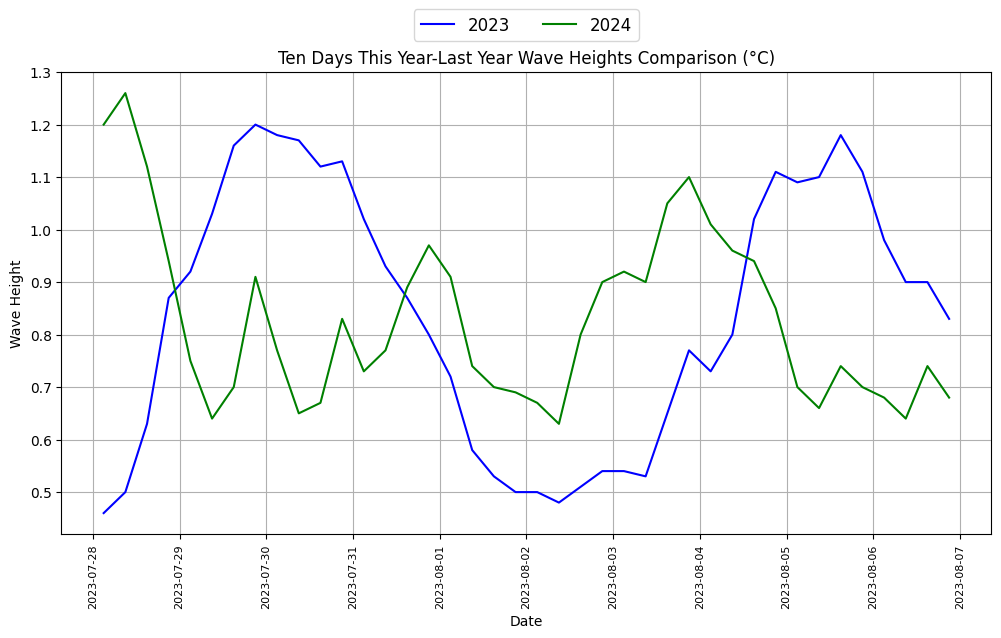

In [58]:
import matplotlib.pyplot as plt



# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))



ax.plot(df_lastyear.index, df_lastyear['waveHeight'],color="blue", label='2023')
ax.plot(df_lastyear.index, df_yesterday['waveHeight'],color="green", label='2024')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Wave Height')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

# Set the title
plt.title('Ten Days This Year-Last Year Wave Heights Comparison (°C)')

# Add legend
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)


plt.grid()

# Show the plot
plt.show()

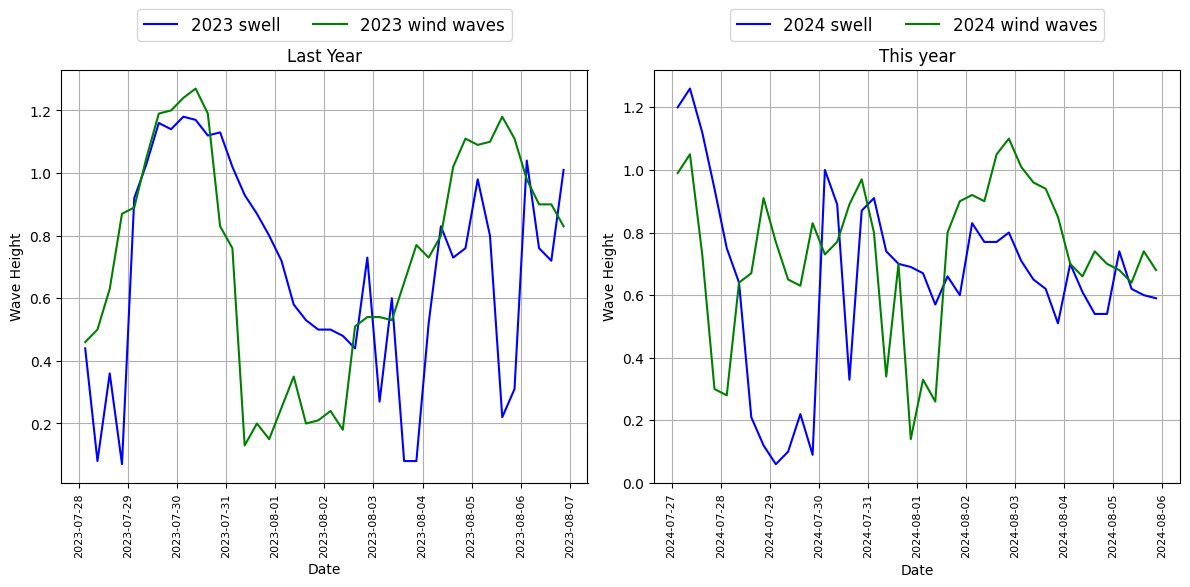

In [59]:
import matplotlib.pyplot as plt

# Create the plot with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the data on the first subplot
ax1.plot(df_lastyear.index, df_lastyear['swellHeight'], color="blue", label='2023 swell')
ax1.plot(df_lastyear.index, df_lastyear['windWaveHeight'], color="green", label='2023 wind waves')
ax1.set_xlabel('Date')
ax1.set_ylabel('Wave Height')
ax1.set_title('Last Year')
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)
ax1.grid()
ax1.tick_params(axis='x', rotation=90, labelsize=8)

# Plot the data on the second subplot (copy of the first)
ax2.plot(df_yesterday.index, df_yesterday['swellHeight'], color="blue", label='2024 swell')
ax2.plot(df_yesterday.index, df_yesterday['windWaveHeight'], color="green", label='2024 wind waves')
ax2.set_xlabel('Date')
ax2.set_ylabel('Wave Height')
ax2.set_title('This year')
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)
ax2.grid()
ax2.tick_params(axis='x', rotation=90, labelsize=8)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [63]:
df_yesterday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2024-07-27 03:00:00+00:00 to 2024-08-05 21:00:00+00:00
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   currentDirection   40 non-null     float64
 1   currentSpeed       40 non-null     float64
 2   gust               40 non-null     float64
 3   swellDirection     40 non-null     float64
 4   swellHeight        40 non-null     float64
 5   swellPeriod        40 non-null     float64
 6   waterTemperature   40 non-null     float64
 7   waveDirection      40 non-null     float64
 8   waveHeight         40 non-null     float64
 9   wavePeriod         40 non-null     float64
 10  windDirection      40 non-null     float64
 11  windWaveDirection  40 non-null     float64
 12  windWaveHeight     40 non-null     float64
 13  windWavePeriod     40 non-null     float64
dtypes: float64(14)
memory usage: 4.7 KB


In [61]:
df_lastyear

,currentDirection,currentSpeed,gust,swellDirection,swellHeight,swellPeriod,waterTemperature,waveDirection,waveHeight,wavePeriod,windDirection,windWaveDirection,windWaveHeight,windWavePeriod
time,,,,,,,,,,,,,,
2023-07-28 03:00:00+00:00,131.82,0.12,4.53,263.12,0.44,4.21,27.99,267.16,0.46,4.00,284.99,265.89,0.46,4.00
2023-07-28 09:00:00+00:00,246.58,0.16,6.64,268.09,0.08,6.37,28.50,268.16,0.50,4.20,292.01,268.58,0.50,4.20
2023-07-28 15:00:00+00:00,330.37,0.13,6.43,266.01,0.36,6.92,28.49,276.06,0.63,6.36,280.46,273.18,0.63,6.36
2023-07-28 21:00:00+00:00,53.68,0.13,6.38,88.19,0.07,2.96,28.04,270.70,0.87,6.76,301.67,273.29,0.87,6.76
2023-07-29 03:00:00+00:00,172.03,0.04,5.56,274.35,0.92,6.71,28.02,273.20,0.92,6.71,286.72,269.74,0.89,6.15
2023-07-29 09:00:00+00:00,252.61,0.10,4.02,272.38,1.03,7.66,28.55,273.50,1.03,7.66,269.59,269.84,1.05,6.56
2023-07-29 15:00:00+00:00,319.21,0.09,5.64,273.10,1.16,7.47,28.29,277.87,1.16,7.47,267.32,270.92,1.19,6.72
2023-07-29 21:00:00+00:00,83.59,0.09,6.31,273.29,1.14,7.35,28.02,278.59,1.20,7.46,285.59,274.21,1.20,7.46
2023-07-30 03:00:00+00:00,150.99,0.04,4.16,272.42,1.18,6.99,27.93,277.39,1.18,6.99,283.94,274.28,1.24,6.29
